# Sampling pi

Notebook written by [Manon Michel](manon.michel@uca.fr)

The beginning of stochastic computation takes place in the XVIIIth century with Buffon’s needle problem, the earliest problem of geometric probability. In 1733, the French naturalist asked the question of determining the probability that a needle of a certain length will lend on a line of the parquet flooring, made of equally spaced and parallel planks (1, p. 43- 45) and solved it in 1777 (2, p. 100 - 104). Even if it was not Buffon’s prime interest, the needle problem can be considered as the first Monte Carlo computation of the number $\pi$, by dropping needles on the parquet flooring and counting how many intersect a line of the floor.

![](buffon_start.png)

The goal here is to recreate the Buffon needle's game and to come up with a better sampling of $\pi$.

Refs:

(1) Buffon. [Histoire de l’Académie Royale des Sciences](http://gallica.bnf.fr/ark:/12148/bpt6k3530m/f51.image.r=). Imprimerie royale (Paris), 1733.

(2) G.-L. Leclerc comte de Buffon. [Histoire Naturelle, Générale et Particulière : supplément](http://www.buffon.cnrs.fr/ice/ice_page_detail.php?lang=fr&type=text&bdd=buffon&table=buffon_hn&bookId=33&typeofbookDes=hns&pageChapter=&pageOrder=104&facsimile=off&search=no). Tome Quatrième. Imprimerie royale (Paris), 1777.


Find below the animation of the simulation to recreate.

<video width="980 " height=" " 
       src="Buffon.mp4"  
       controls>
</video>

Library importation

In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.lines as mlines
from matplotlib.ticker import FixedLocator

plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 8

Below, please:
1. Write the routine `add_needle` for the random needle throw.
2. What is the impact of the value of the r parameter?
3. Analytically derive the probability of a needle throw hitting two planks (r < 1 case)
4. What is the average value of the observable $\theta$ which is equal to $1$ when a needle hits two planks and $0$ otherwise?
5. Write the routine `get_running_pi` to estimate $\pi$ from the first `n_throws` samples (`n_throws` being a number)
6. Write the routine `generate_throws` to generate $N$ samples and print the estimated value of $\pi$

In [2]:
class buffon_exp:
    def __init__(self):
        # Parameter initialization
        self.l = 0.33 # needle length
        self.d = 1.0 # plank width
        self.r = self.l / self.d 
        self.N = 1000 # Number of needle throws
        self.start = self.N + 1 # number of first plank-hitting needle (
                                #(initialized to a value bigger than self.N)
        self.nx = 10 # Number of planks
        self.ny = 5 # self.d * self.ny = height of a plank
        self.Lx = [i * self.d for i in range(self.nx)]
        self.data = [] # Store whether a throw is hitting two planks or not
        self.C = [] # Store thrown needle positions. A needle configuration
                    # is completely determined by thre triplet (x, y, phi)
                    # x, y = needle center position and phi = needle angle

    def add_needle(self):
        # Write a routine randomly throwing a needle and 
        # checking whether the throw hit two planks   
        
    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
                
    def generate_throws(self):
        # Write a routine to generate self.N needle throw and compute the estimated pi
        
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        ax.plot(np.array([]), 
                np.array([]),
                 lw=1.5, c = color, alpha = alpha)
            
    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        for i in range(self.nx+1):
            self.axes[0].axvline(x = i * self.d, c = 'k')
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-self.d/2.0,self.nx * self.d + self.d/2.0)
        self.axes[0].set_ylim(-self.d/2.0, self.ny * self.d + self.d/2.0)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,4)
    
    def plot_total(self):
        self.set_fig()
        for throw in range(self.N):                
            x, y, phi = self.C[throw]
            if self.data[throw] == 1:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., c = 'r')
            else:
                line = mlines.Line2D([x + self.l / 2.0 * math.cos(phi), x - self.l / 2.0 *math.cos(phi)], 
                                     [y + self.l / 2.0 * math.sin(phi), y - self.l / 2.0 *math.sin(phi)], 
                                     axes = self.axes[0], lw=2., alpha = 0.1, c = 'k')
            self.axes[0].add_line(line)
        if self.start < self.N:
            self.axes[1].plot(np.array([float(len(self.data[:(i)])) for i in range(self.N)]), 
                              np.array([self.estimate_pi(i) for i in range(self.N)]),
                              lw=1.5, c = 'k')    
        plt.show()


Generating needle throws
hat_pi =  3.36734693877551 for 1000 throws


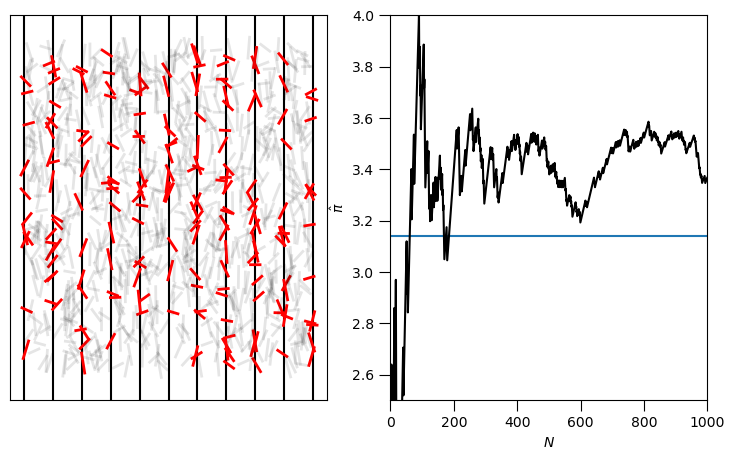

In [3]:
run_buffon = buffon_exp()
run_buffon.generate_throws()
run_buffon.plot_total()

7. How is the error between the estimator $\hat{\pi}$ and $\pi$ behaving with the number of samples $N$? Generate the error plot of 10 experiments. To do so, complete the `plot_error` routine above.



Generating needle throws
hat_pi =  3.3333333333333335 for 1000 throws
Generating needle throws
hat_pi =  3.3846153846153846 for 1000 throws
Generating needle throws
hat_pi =  3.0414746543778803 for 1000 throws
Generating needle throws
hat_pi =  3.2352941176470593 for 1000 throws
Generating needle throws
hat_pi =  3.3165829145728645 for 1000 throws
Generating needle throws
hat_pi =  2.9729729729729732 for 1000 throws
Generating needle throws
hat_pi =  3.251231527093596 for 1000 throws
Generating needle throws
hat_pi =  3.2038834951456314 for 1000 throws
Generating needle throws
hat_pi =  2.808510638297873 for 1000 throws
Generating needle throws
hat_pi =  2.9464285714285716 for 1000 throws


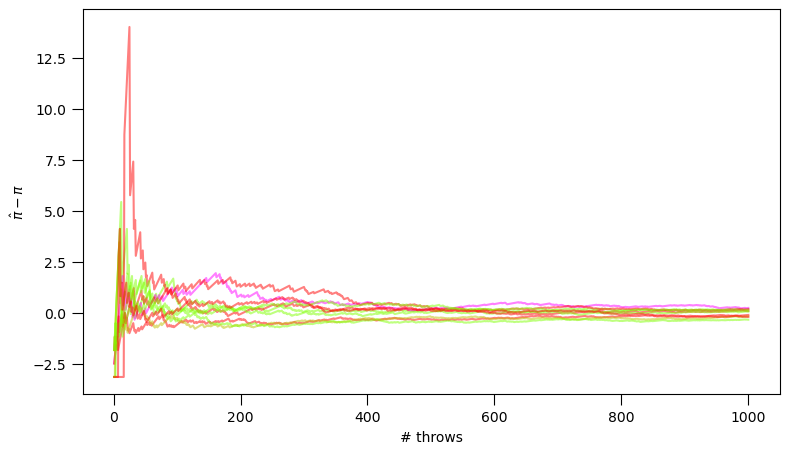

In [4]:
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig, alpha = 0.5)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')
plt.show()

8. What is the variance of the estimator $\hat{\theta} = \frac{1}{N}\sum_{i=1}^N \theta_i$, $N$ being the number of throws?

9. Derive the variance of the estimator $\hat{\pi}$ you constructed


In order to construct an estimator of $\pi$ with a smaller variance, we now consider an experiment which will make the estimator $\hat{\pi}$ proportional to the averaged number of hits. 

We now throw pointwise pebbles in a unit square.
Below, please:

10. Write the routine `add_peeble` for the random peeble throw. What criterion should make a thrown peeble a successful hit?

11. Analytically derive the probability of a peeble throw to be successful

12. What is the average value of the observable $\theta$ which is equal to $1$ when a throw is successful and $0$ otherwise?

13. Write the routine `get_running_pi` to estimate $\pi$ from the first `n_throws` samples (`n_throws` being a number)

14. Write the routine `generate_throws` to generate $N$ samples and print the estimated value of $\pi$

In [5]:
class peeble_exp:
    def __init__(self):
        self.data = [] # Store whether a hit is successful or not
        self.C = [] # Store throw positions
        self.N = 1000 # Number of throws
        
    def add_peeble(self):
        # Write a routine randomly throwing a peeble in a unit square and 
        # define a criterion for a successful hit  
    
    def estimate_pi(self, n_throws):
        # Write a routine to estimate pi from the first `n_throws` samples
        
    def generate_throws(self):
        # Write a routine to generate self.N peeble throw and compute the estimated pi
    
    def plot_error(self, **kwargs):
        # Complete the routine to plot the error between the estimated pi and its true value.
        if 'fig' in kwargs:
            fig_err = kwargs['fig']
        else:
            fig_err = plt.fig(figsize=(9,5))
        if 'color' in kwargs:
            color =  kwargs['color']
        else:
            color = random.choice(['k','b','y','r','chartreuse','magenta'])
        if 'alpha' in kwargs:
            alpha = kwargs['alpha']
        else:
            alpha = 1.0
        ax = fig_err.gca()
        start = self.data.index(1)
        ax.plot(np.array([]), np.array([]),
                lw=1.5, c = color, alpha = alpha)

    def set_fig(self):
        self.fig, self.axes=plt.subplots(1, 2, figsize = (9, 5))
        self.axes[0].set_xticks([]);self.axes[0].xaxis.set_ticklabels([])
        self.axes[0].set_yticks([]);self.axes[0].yaxis.set_ticklabels([])
        self.axes[0].set_xlim(-0.7,0.7)
        self.axes[0].set_ylim(-0.7, 0.7)
        self.axes[1].axhline(y=math.pi)
        self.axes[1].set_ylabel(r'$\hat{\pi}$', fontsize=10)
        self.axes[1].set_xlabel(r'$N$', fontsize=10)
        self.axes[1].set_xlim(0,self.N)
        self.axes[1].set_ylim(2.5,3.5)

    def plot_total(self):
        self.set_fig()
        color_list = []
        for throw in range(self.N):
            if self.data[throw] == 1:
                color_list += ['r']
            else:
                color_list += ['k']
        self.axes[0].scatter(np.array(self.C)[:,0], np.array(self.C)[:,1], marker='o', 
                                 color=color_list , alpha=0.8)
        self.axes[1].plot(np.array([ float(len(self.data[:(i)])) for i in range(self.N)]), 
                          np.array([self.estimate_pi(i) for i in range(self.N)]), lw=1.5, c = 'k') 
        plt.show()

Generating peeble throws
hat_pi =  3.188 for 1000 throws


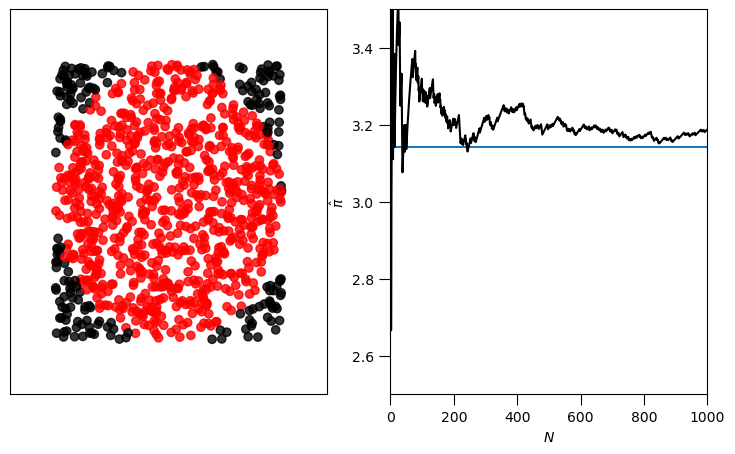

In [6]:
run_peeble = peeble_exp()
run_peeble.generate_throws()
run_peeble.plot_total()

15. How is the error between the estimator $\hat{\pi}$ and $\pi$ behaving with the number of samples $N$? Generate the error plot of 10 experiments and compare with the Buffon experiment. To do so, complete the `plot_error` routine above in `peeble_exp` and run the code below.


Generating peeble throws
hat_pi =  3.124 for 1000 throws
Generating peeble throws
hat_pi =  3.152 for 1000 throws
Generating peeble throws
hat_pi =  3.108 for 1000 throws
Generating peeble throws
hat_pi =  3.092 for 1000 throws
Generating peeble throws
hat_pi =  3.216 for 1000 throws
Generating peeble throws
hat_pi =  3.148 for 1000 throws
Generating peeble throws
hat_pi =  3.044 for 1000 throws
Generating peeble throws
hat_pi =  3.084 for 1000 throws
Generating peeble throws
hat_pi =  3.108 for 1000 throws
Generating peeble throws
hat_pi =  3.096 for 1000 throws


Generating needle throws
hat_pi =  3.0 for 1000 throws
Generating needle throws
hat_pi =  2.832618025751073 for 1000 throws
Generating needle throws
hat_pi =  3.455497382198953 for 1000 throws
Generating needle throws
hat_pi =  3.350253807106599 for 1000 throws
Generating needle throws
hat_pi =  2.986425339366516 for 1000 throws
Generating needle throws
hat_pi =  3.1578947368421058 for 1000 throws
Generating needle throws
ha

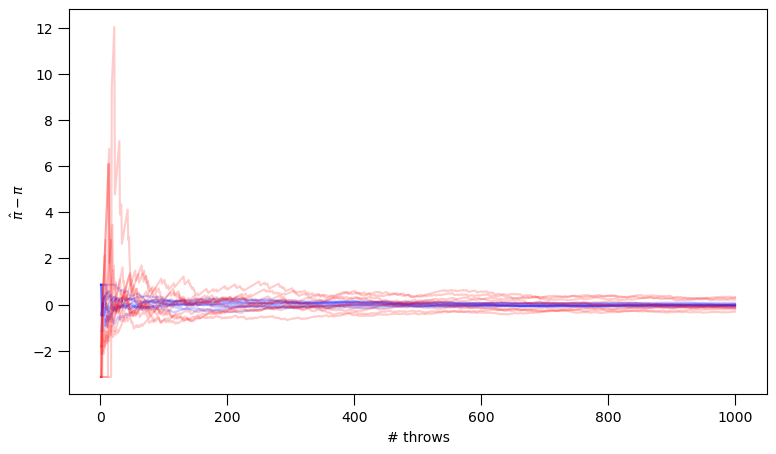

In [7]:
run_peeble = peeble_exp()
run_buffon = buffon_exp()
fig=plt.figure(figsize=(9,5))
for iter_experiment in range(10):
    run_peeble.generate_throws()
    run_peeble.plot_error(fig=fig,color='b',alpha=0.2)
    run_peeble.C=[]
    run_peeble.data=[]
print ('\n')
for iter_experiment in range(10):
    run_buffon.generate_throws()
    run_buffon.plot_error(fig=fig,color='r',alpha=0.2)
    run_buffon.C=[]
    run_buffon.data=[]
plt.xlabel('# throws')
plt.ylabel(r'$\hat{\pi}-\pi$')    
plt.show()

16. Derive the variance of the estimator $\hat{\pi}$ for the peeble experiment. How does it compare to the one of the Buffon experiment? Is it consistent with the numerical experiments?


17. Could you propose a better experiment and estimator to get $\pi$? (Propose it below and compare it with the previous experiments)